In [6]:
import pandas as pd

energy = pd.read_csv("../data/uf_energy_year.csv")
pib = pd.read_csv("../data/uf_pib_year.csv")

df_merged = pd.merge(energy, pib, on=['ano', 'uf'], how='inner')

df_merged.to_csv("../data/merged_data.csv", index=False)

print("Merged data saved to 'merged_data.csv'.")

Merged data saved to 'merged_data.csv'.


In [2]:
import pandas as pd

consumo_data = pd.read_csv("../data/uf_pib_energy_year.csv")

tipo_consumo_data = pd.read_csv("../data/uf_highest_consumption_per_year.csv")

merged_data = pd.merge(consumo_data, tipo_consumo_data, left_on=['ano', 'uf'], right_on=['ano', 'sigla_uf'])

merged_data.to_csv("../data/uf_pib_energy_year_classified.csv", index=False)

                         soma_produto_interno_bruto
ano  uf                                            
2004 AC consumo_energia                         NaN
     AL consumo_energia                         NaN
     AM consumo_energia                         NaN
     AP consumo_energia                         NaN
     BA consumo_energia                         NaN
...                                             ...
2021 RS consumo_energia                         NaN
     SC consumo_energia                         NaN
     SE consumo_energia                         NaN
     SP consumo_energia                         NaN
     TO consumo_energia                         NaN

[486 rows x 1 columns]


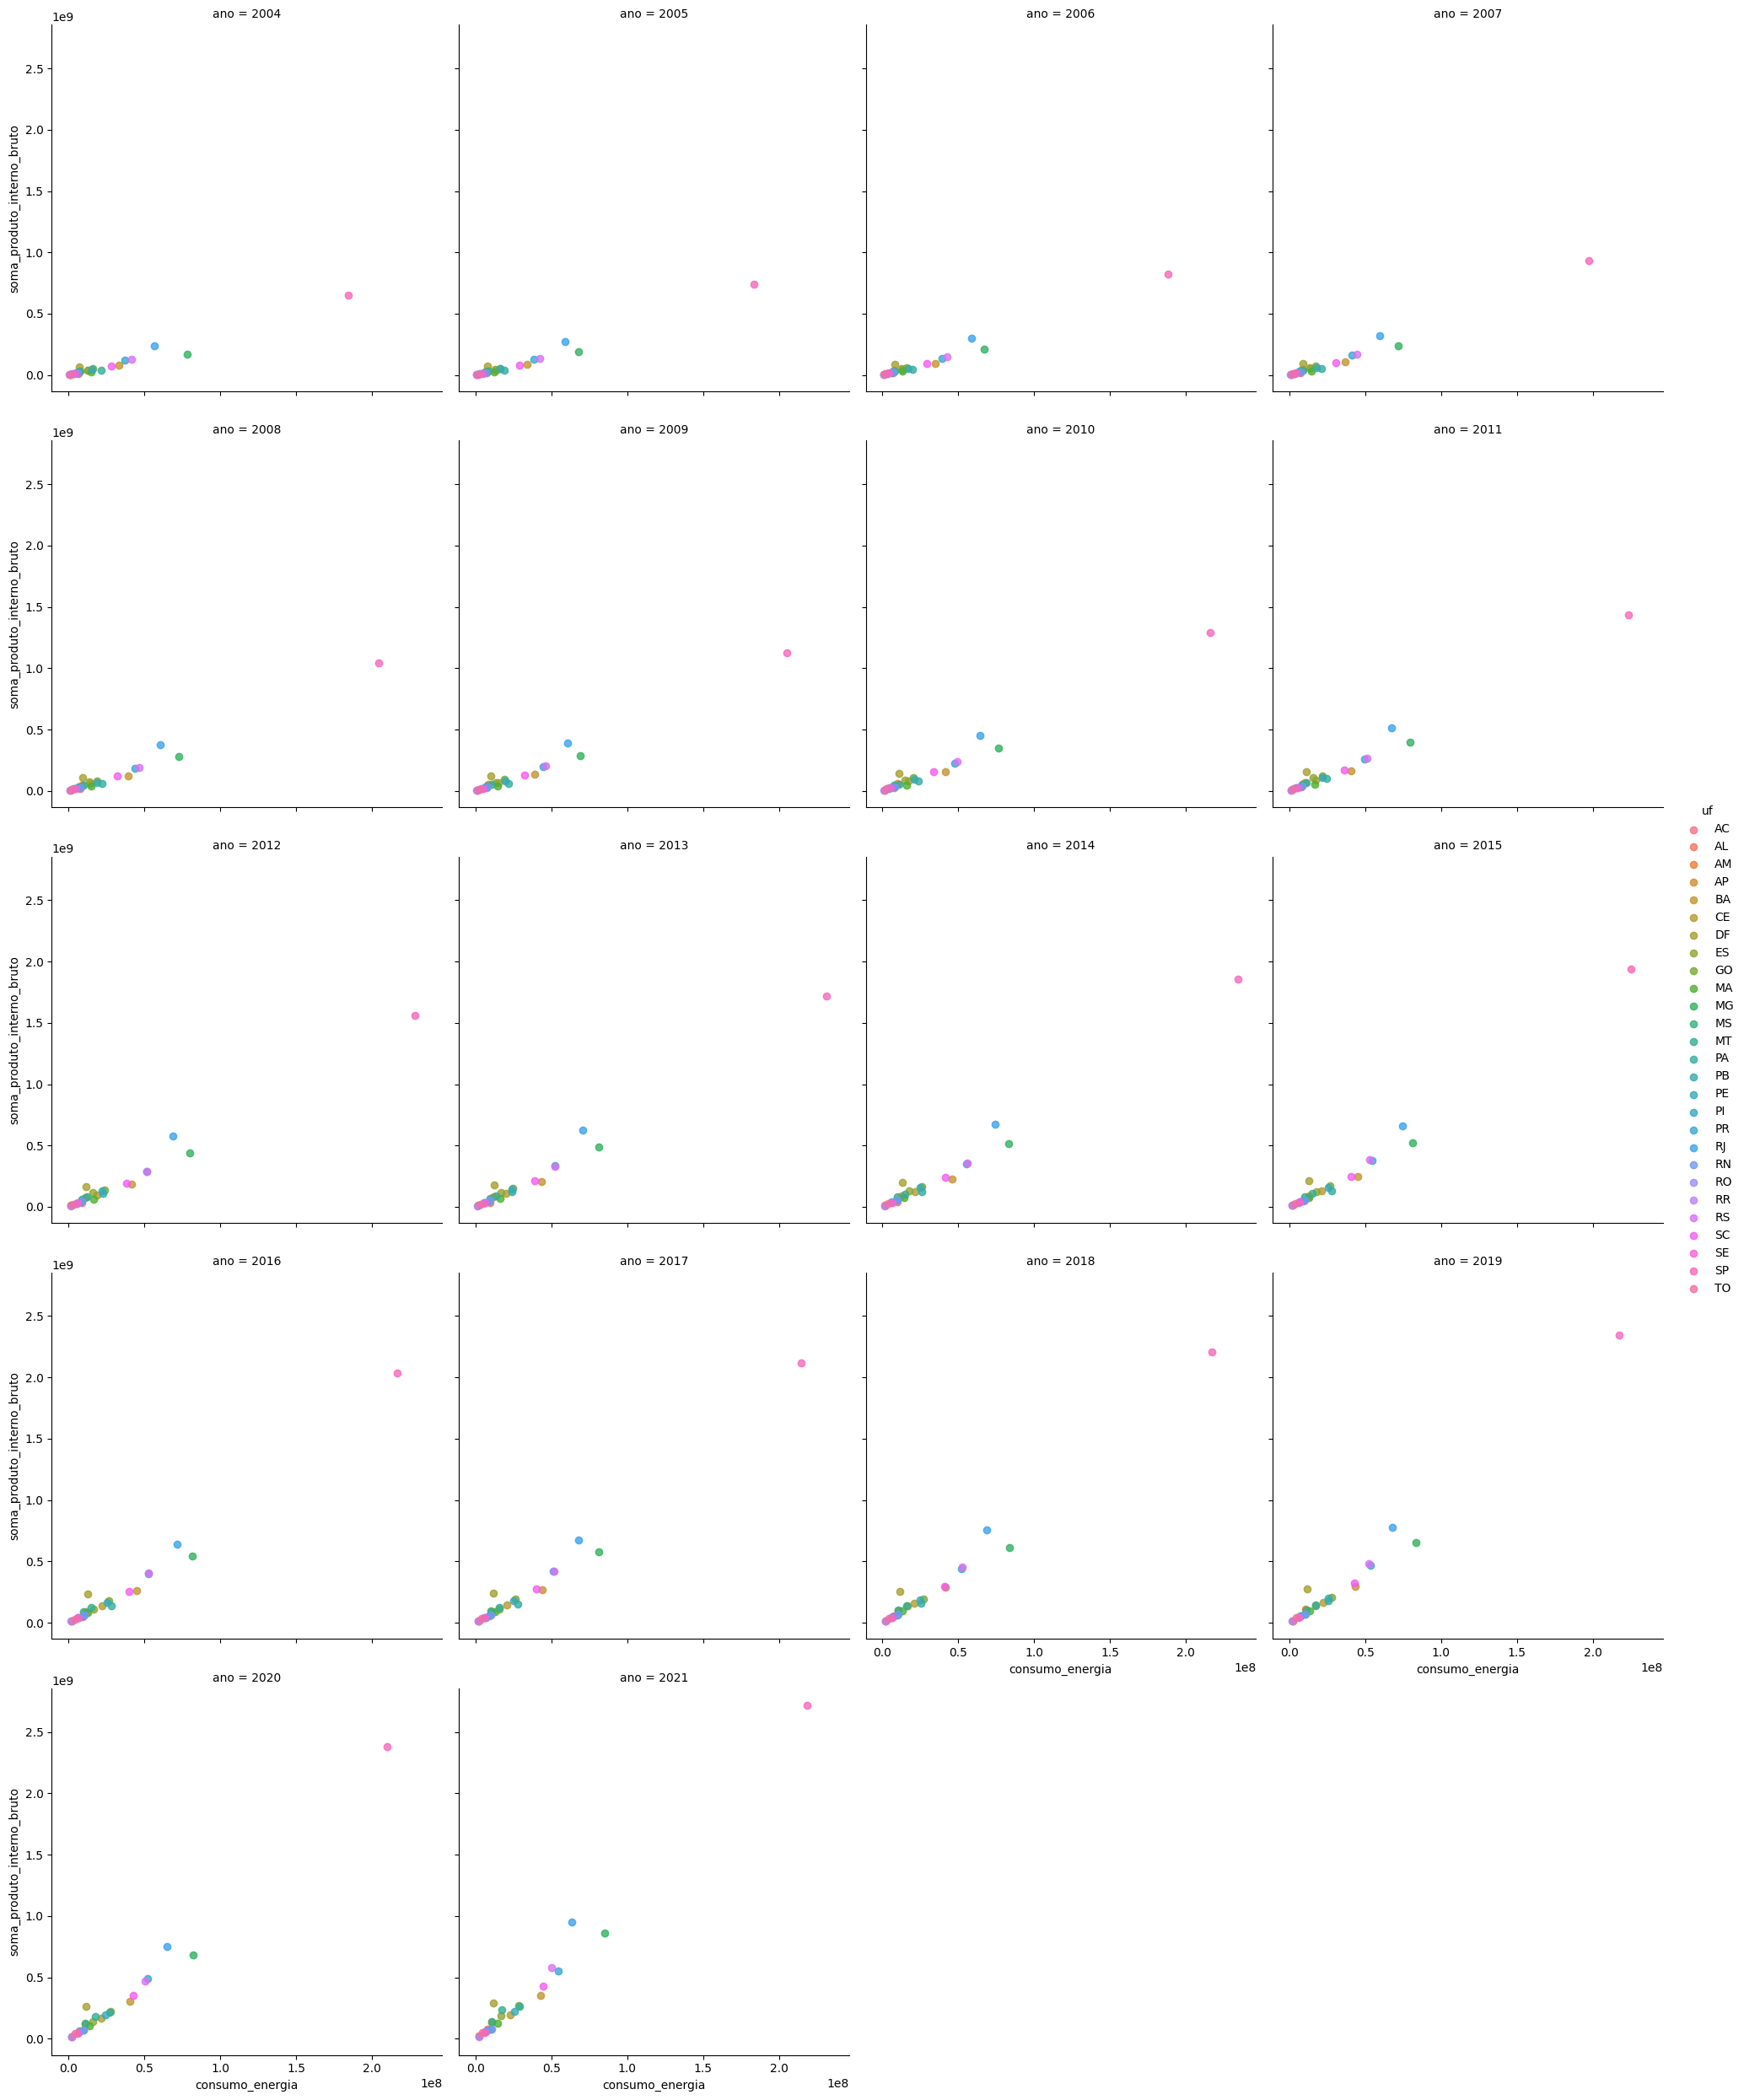

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../data/uf_pib_energy_year.csv")

df = pd.DataFrame(data)

correlations = df.groupby(['ano', 'uf'])[['consumo_energia', 'soma_produto_interno_bruto']].corr().iloc[0::2][['soma_produto_interno_bruto']]

print(correlations)

sns.lmplot(x="consumo_energia", y="soma_produto_interno_bruto", hue="uf", col="ano", data=df, col_wrap=4)
plt.show()

Correlation:
0.9252810162555835

R-squared (R2):
0.8561449590429653


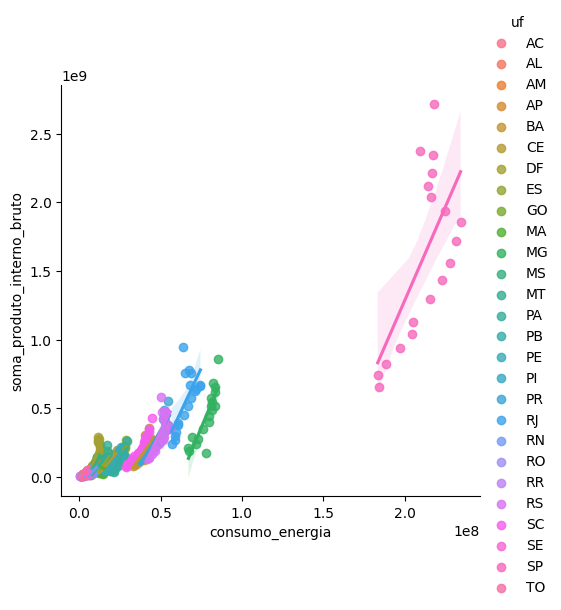

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../data/uf_pib_energy_year.csv")
df = pd.DataFrame(data)

correlation_r2 = df[['consumo_energia', 'soma_produto_interno_bruto']].corr().iloc[0,1]

r2 = correlation_r2 ** 2

print("Correlation:")
print(correlation_r2)

print("\nR-squared (R2):")
print(r2)

sns.lmplot(x="consumo_energia", y="soma_produto_interno_bruto", hue="uf", data=df)
plt.show()

# Modelos de Regressão:
# - Regressão Linear Simples
# - Regressão de Árvore de Decisão
# - Regressão de Floresta Aleatória

Resultados da Regressão Linear:
R2 Score: 0.8288228353369846
Mean Squared Error: 2.112245174600109e+16
Mean Absolute Error: 67204105.3110219


Resultados da Árvore de Decisão:
R2 Score: 0.7595833161837575
Mean Squared Error: 2.9666280621245616e+16
Mean Absolute Error: 64225379.77551021


Resultados da Floresta Aleatória:
R2 Score: 0.8025274170908232
Mean Squared Error: 2.4367181871884908e+16
Mean Absolute Error: 57940708.1482653


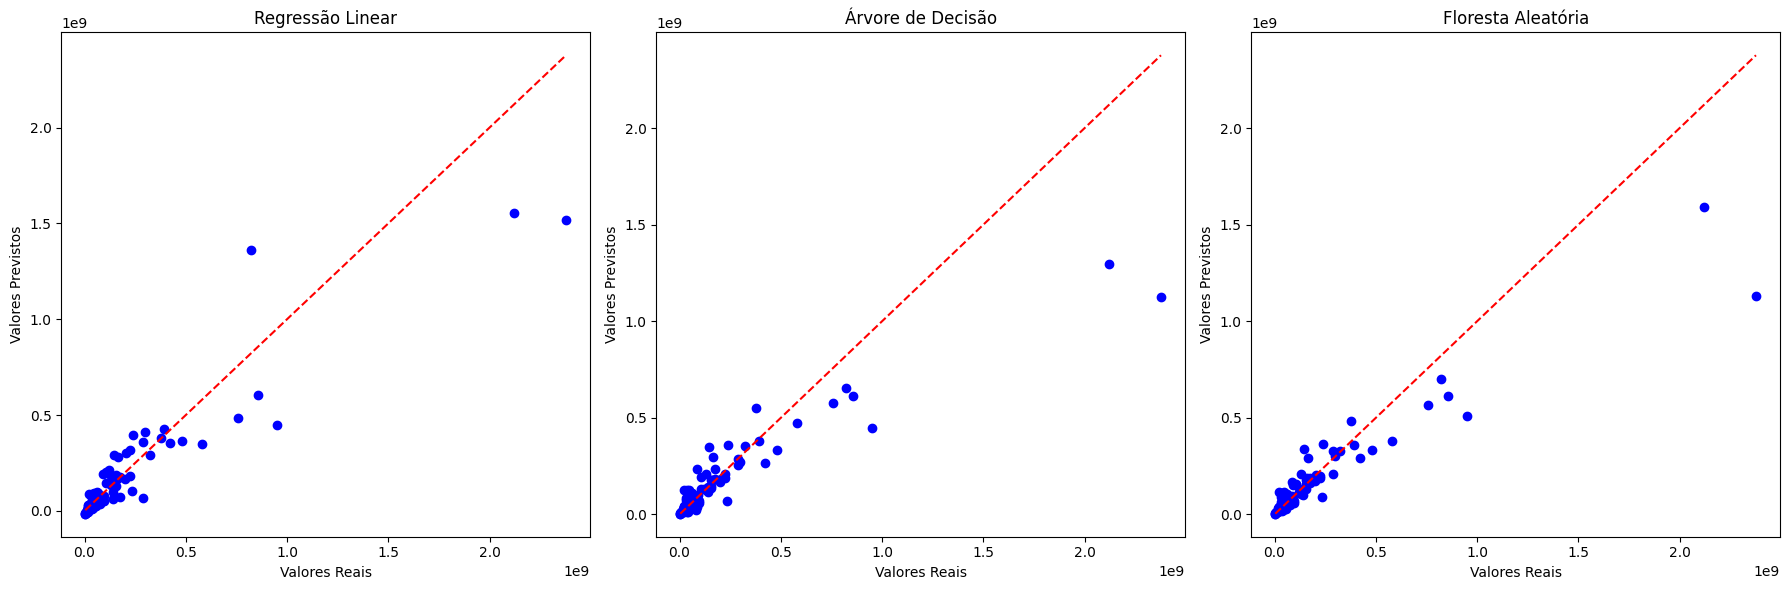

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../data/uf_pib_energy_year.csv")

X = data[['consumo_energia']]
y = data['soma_produto_interno_bruto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)

linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_decision_tree_reg = decision_tree_reg.predict(X_test)
y_pred_random_forest_reg = random_forest_reg.predict(X_test)

r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)

r2_decision_tree_reg = r2_score(y_test, y_pred_decision_tree_reg)
mse_decision_tree_reg = mean_squared_error(y_test, y_pred_decision_tree_reg)
mae_decision_tree_reg = mean_absolute_error(y_test, y_pred_decision_tree_reg)

r2_random_forest_reg = r2_score(y_test, y_pred_random_forest_reg)
mse_random_forest_reg = mean_squared_error(y_test, y_pred_random_forest_reg)
mae_random_forest_reg = mean_absolute_error(y_test, y_pred_random_forest_reg)

print("Resultados da Regressão Linear:")
print("R2 Score:", r2_linear_reg)
print("Mean Squared Error:", mse_linear_reg)
print("Mean Absolute Error:", mae_linear_reg)
print("\n")

print("Resultados da Árvore de Decisão:")
print("R2 Score:", r2_decision_tree_reg)
print("Mean Squared Error:", mse_decision_tree_reg)
print("Mean Absolute Error:", mae_decision_tree_reg)
print("\n")

print("Resultados da Floresta Aleatória:")
print("R2 Score:", r2_random_forest_reg)
print("Mean Squared Error:", mse_random_forest_reg)
print("Mean Absolute Error:", mae_random_forest_reg)




# Plotar valores reais versus previstos para cada modelo de regressão
plt.figure(figsize=(18, 6))

# Regressão Linear
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear_reg, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Regressão Linear")

# Árvore de Decisão
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_decision_tree_reg, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Árvore de Decisão")

# Floresta Aleatória
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_random_forest_reg, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Floresta Aleatória")

plt.tight_layout()
plt.show()

# Modelos de Classificação:
# - Regressão Logística
# - K-Vizinhos Mais Próximos (K-Nearest Neighbors - KNN)
# - Máquina de Vetores de Suporte (Support Vector Machine - SVM)
# Features (Variáveis de Entrada): "consumo_energia" (Consumo de Energia)
# Target (Variável de Saída): "classe" (Classe de consumo de energia)

Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00        18
           2       1.00      0.00      0.00        26
           3       1.00      0.00      0.00        17
           4       1.00      0.00      0.00         5
           5       0.33      1.00      0.49        32

    accuracy                           0.33        98
   macro avg       0.87      0.20      0.10        98
weighted avg       0.78      0.33      0.16        98

Matriz de Confusão - Regressão Logística:
[[ 0  0  0  0 18]
 [ 0  0  0  0 26]
 [ 0  0  0  0 17]
 [ 0  0  0  0  5]
 [ 0  0  0  0 32]]

Relatório de Classificação - KNN:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         5
           5       1.0

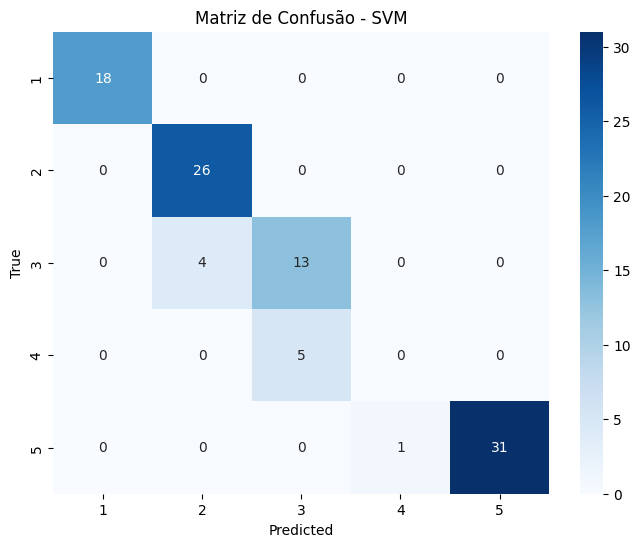

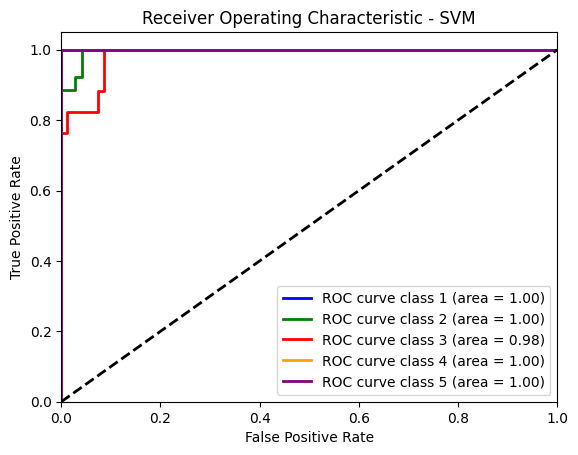

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc



data = pd.read_csv("../data/uf_pib_energy_year.csv")

data['classe'] = pd.cut(data['consumo_energia'], bins=[0, 5000000, 10000000, 15000000, 20000000, np.inf], labels=[1, 2, 3, 4, 5])

X = data[['consumo_energia']]
y = data['classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_reg = LogisticRegression()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC(probability=True)

logistic_reg.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

y_pred_logistic_reg = logistic_reg.predict(X_test)
y_pred_knn_classifier = knn_classifier.predict(X_test)
y_pred_svm_classifier = svm_classifier.predict(X_test)

print("Relatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_logistic_reg, zero_division=1))
print("Matriz de Confusão - Regressão Logística:")
print(confusion_matrix(y_test, y_pred_logistic_reg))

print("\nRelatório de Classificação - KNN:")
print(classification_report(y_test, y_pred_knn_classifier, zero_division=1))
print("Matriz de Confusão - KNN:")
print(confusion_matrix(y_test, y_pred_knn_classifier))

print("\nRelatório de Classificação - SVM:")
print(classification_report(y_test, y_pred_svm_classifier, zero_division=1))
print("Matriz de Confusão - SVM:")
print(confusion_matrix(y_test, y_pred_svm_classifier))
cm = confusion_matrix(y_test, y_pred_svm_classifier)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão - SVM')
plt.show()

y_probs_svm = svm_classifier.predict_proba(X_test)
n_classes = y_probs_svm.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=[1, 2, 3, 4, 5])[:, i], y_probs_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'green', 'red', 'orange', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

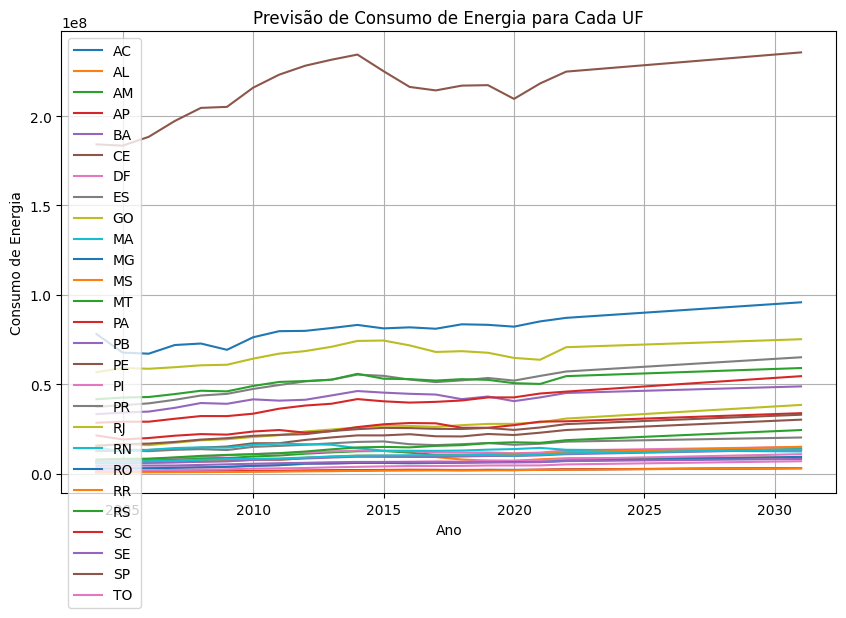

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv("../data/uf_pib_energy_year.csv")

data = data[['ano', 'uf', 'consumo_energia', 'soma_produto_interno_bruto']]

predictions_energy = {}
predictions_gdp = {}

for uf in data['uf'].unique():
    uf_data = data[data['uf'] == uf]
    
    X = uf_data[['ano']]
    y_energy = uf_data['consumo_energia']
    y_gdp = uf_data['soma_produto_interno_bruto']
    
    X_train, X_test, y_energy_train, y_energy_test = train_test_split(X, y_energy, test_size=0.2, random_state=42)
    _, _, y_gdp_train, y_gdp_test = train_test_split(X, y_gdp, test_size=0.2, random_state=42)
    
    energy_reg = LinearRegression()
    energy_reg.fit(X_train, y_energy_train)
    
    gdp_reg = LinearRegression()
    gdp_reg.fit(X_train, y_gdp_train)
    
    future_years = range(uf_data['ano'].max() + 1, uf_data['ano'].max() + 11)
    future_years = pd.DataFrame(future_years, columns=['ano'])
    
    future_energy_pred = energy_reg.predict(future_years)
    future_gdp_pred = gdp_reg.predict(future_years)
    
    predictions_energy[uf] = future_energy_pred
    predictions_gdp[uf] = future_gdp_pred

plt.figure(figsize=(10, 6))

for uf, pred_energy in predictions_energy.items():
    plt.plot(range(data['ano'].min(), data['ano'].max() + 11), list(data[data['uf'] == uf]['consumo_energia']) + list(pred_energy), label=uf)

plt.xlabel('Ano')
plt.ylabel('Consumo de Energia')
plt.title('Previsão de Consumo de Energia para Cada UF')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()